In [ ]:
# Import packages/libraries
import collections
import pandas as pd
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nltk #Import NLTK library
nltk.download('punkt') #installed punkt to fix error
from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python
import string #Punctuation
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import codecs


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
%cd /content/drive/MyDrive/Harry_Potter_Book_Data/

/content/drive/MyDrive/Harry_Potter_Book_Data


In [ ]:
!ls

"Book 1 - The Philosopher's Stone.txt"	'Book 5 - The Order of the Phoenix.txt'
'Book 2 - The Chamber of Secrets.txt'	'Book 6 - The Half Blood Prince.txt'
'Book 3 - The Prisoner of Azkaban.txt'	'Book 7 - The Deathly Hallows.txt'
'Book 4 - The Goblet of Fire.txt'


In [ ]:
import glob

read_files = glob.glob("*.txt")

with open("all.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

In [ ]:
import csv
filename="/content/drive/MyDrive/harry save data/all.txt"
df=pd.read_csv(filename, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',skipinitialspace = True,names=["sentence"])
df=df.fillna('')

In [ ]:
df[2:7]

,sentence
2,THE DARK LORD ASCENDING
3,"The two men appeared out of nowhere, a few yards"
4,"apart in the narrow, moonlit lane. For a secon..."
5,"stood quite still, wands directed at each othe..."
6,"chests; then, recognizing each other, they sto..."


Tokentization and bag of words


For bag of words the book text is represented as a bag of words which cotains comma separated words.The implication here is that each word is analyzed individually, not taking into account word order or grammar.To transform the data into a bag of words, my code:

1.removes end of line (/n) characters from the text

2.splits the text by whitespace to break into words

3.lowercases all text

4.removes all punctuation


-------------------------------------------------

For tokenization.Tokenization is the first step in NLP. It is the process of breaking strings into tokens which in turn are small structures or units. Tokenization involves three steps which are breaking a complex sentence into words, understanding the importance of each word with respect to the sentence and finally produce structural description on an input sentence.



Importing library and read data

In [ ]:
stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords


In [ ]:
df[2:7]

,sentence
2,THE DARK LORD ASCENDING
3,"The two men appeared out of nowhere, a few yards"
4,"apart in the narrow, moonlit lane. For a secon..."
5,"stood quite still, wands directed at each othe..."
6,"chests; then, recognizing each other, they sto..."


In [ ]:
df['sentence']=df['sentence'].str.lower()
df[2:7]

,sentence
2,the dark lord ascending
3,"the two men appeared out of nowhere, a few yards"
4,"apart in the narrow, moonlit lane. for a secon..."
5,"stood quite still, wands directed at each othe..."
6,"chests; then, recognizing each other, they sto..."


In [ ]:
df['sentence']=df['sentence'].apply(remove_punctuations)
df[2:7]

,sentence
2,the dark lord ascending
3,the two men appeared out of nowhere a few yards
4,apart in the narrow moonlit lane for a second ...
5,stood quite still wands directed at each other’s
6,chests then recognizing each other they stowed


In [ ]:
df['sentence']=df['sentence'].apply(word_tokenize) # Word Count Text
df[2:7]

,sentence
2,"[the, dark, lord, ascending]"
3,"[the, two, men, appeared, out, of, nowhere, a,..."
4,"[apart, in, the, narrow, moonlit, lane, for, a..."
5,"[stood, quite, still, wands, directed, at, eac..."
6,"[chests, then, recognizing, each, other, they,..."


Stop Words

“Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all”. These words do not provide any meaning and are usually removed from texts. We have remove these stop words using nltk library

In [ ]:
df['sentence']=df['sentence'].apply(lambda x: [word for word in x if word not in stopwords]) 
df[2:7]

,sentence
2,"[dark, lord, ascending]"
3,"[two, men, appeared, nowhere, yards]"
4,"[apart, narrow, moonlit, lane, second]"
5,"[stood, quite, still, wands, directed, ’]"
6,"[chests, recognizing, stowed]"


Stemming


There are two methods in Stemming namely, Porter Stemming (removes common morphological and inflectional endings from words) and Lancaster Stemming (a more aggressive stemming algorithm). We have used the Porter Stemming.

In [ ]:
#from nltk.stem import PorterStemmer
#stemmer=PorterStemmer()

In [ ]:
#def word_stemmer(text):
#     stem_text=[stemmer.stem(i) for i in text]
#     return stem_text

In [ ]:
#df['sentence']=df['sentence'].apply(lambda x:word_stemmer(x))

In [ ]:
#df[:20]

,sentence
0,[]
1,[]
2,"[dark, lord, ascendin]"
3,"[two, men, appear, nowher, yard]"
4,"[part, narrow, moonlit, lane, second]"
5,"[tood, quit, still, wand, direct, ’]"
6,"[hest, recogn, stow]"
7,"[heir, wand, beneath, cloak, start, walkin]"
8,"[riskli, directio]"
9,"[news, ”, ask, taller, tw]"


Lemmatizing

In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.


In [ ]:
#from nltk.stem import WordNetLemmatizer
#lemmatizer=WordNetLemmatizer()

In [ ]:
#def word_lemmatizer(text):
     #lem_text=[lemmatizer.lemmatize(i) for i in text]
     #return lem_text

In [ ]:
#df['sentence']=df['sentence'].apply(lambda x:word_lemmatizer(x))

In [ ]:
#df[2:7]

,sentence
2,"[dark, lord, ascendin]"
3,"[two, men, appear, nowher, yard]"
4,"[part, narrow, moonlit, lane, second]"
5,"[tood, quit, still, wand, direct, ’]"
6,"[hest, recogn, stow]"


In [ ]:
df1=df

In [ ]:
df1['WordCount'] = df1['sentence'].str.len() 
df1[:5]

,sentence,WordCount
0,[],0
1,[],0
2,"[dark, lord, ascending]",3
3,"[two, men, appeared, nowhere, yards]",5
4,"[apart, narrow, moonlit, lane, second]",5


In [ ]:
df.to_excel("/content/drive/MyDrive/Harry_Potter_Book_Data/df.xlsx", index=False)

In [ ]:
# Bring in df
df = pd.read_excel("/content/drive/MyDrive/Harry_Potter_Book_Data/df.xlsx")

# Bring in string punctuation

Printing 20 Most Common words in "Harry Potter"

In [ ]:
# Lists in df currently strings - remove double quotes
df['sentence']=df['sentence'].apply(lambda x: x.strip('][').split(', '))

In [ ]:
# Create Dictionary and list
wordcount={}
list = []

# Get Words Ready
for x in df.sentence:
    list.extend(x)

In [ ]:
# Clean text
textcount=str(list).split()
textcount=[''.join(c for c in s if c not in string.punctuation) for s in textcount] #Remove punctuation

# Wordcount Loop
# If the word is not in the stop words, it's added to the dictionary with a count.
# If the word already exists in the dictionary, the count is made one higher.

for word in textcount:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Clean messy words out of dictionary - FOR HP ONLY
del wordcount['—']
del wordcount['ter']
del wordcount['’']
del wordcount['“']
del wordcount['”']
del wordcount['jk']
del wordcount['e']
del wordcount['hi']
del wordcount['h']
#del wordcount['rry']

    
# Printing 20 Most Common words in "Harry Potter"
Counts = collections.Counter(wordcount)

for word, count in Counts.most_common(20):
    print(word, ": ", count)

harry :  219160
said :  144910
ron :  63280
potter :  58800
hermione :  53500
page :  48160
rowling :  47130
dumbledore :  33620
back :  32340
could :  28610
one :  26130
like :  23790
looked :  23610
would :  23010
know :  22870
around :  22610
got :  21090
hagrid :  20410
professor :  20310
well :  20160


How many time all the charecters has been mentioned

In [ ]:
characters = ['harry', 'ron', 'hermione', 'sirius', 'fred', 'george',
              'percy','voldemort', 'tom', 'dumbledore', 'snape', 'malfoy', 'hagrid',
              'crabbe', 'goyle', 'mcgonagall', 'ginny','neville', 'lavender',
             'dudley', 'vernon', 'petunia', 'lily', 'james','hooch', 'dean', 'seamus', 'charlie', 'draco', 'pomfrey', 'quirrell', 'sprout', 'oliver','ginny','luna']
CharDictionary = {x:wordcount[x] for x in characters}

Counts = collections.Counter(CharDictionary)

for word, count in Counts.most_common(51):
    print(word, ": ", count)

harry :  219160
ron :  63280
hermione :  53500
dumbledore :  33620
hagrid :  20410
snape :  18250
malfoy :  13320
voldemort :  12410
sirius :  11350
fred :  9100
george :  7760
neville :  7740
ginny :  7690
mcgonagall :  7340
vernon :  5050
dudley :  4350
percy :  4120
luna :  3430
petunia :  2880
draco :  2370
goyle :  2350
crabbe :  2300
dean :  2100
james :  1880
seamus :  1800
pomfrey :  1560
lavender :  1370
tom :  1280
lily :  1250
quirrell :  1230
charlie :  1100
sprout :  930
hooch :  530
oliver :  390


Future Work


1.Part of Speech Tagging
Part-of-speech tagging is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection) based on its definition and its context.

2.Named Entity Recognization
It is the process of detecting the named entities such as the person name, the location name.

3.Chunking

Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining, chunking means a grouping of words or tokens into chunks.

4.Neo4j Graph Relation
We will show the reation beetween the Charecters(Named) Entity in Neo4j

Word2Vector

In [ ]:
# Importing Packages
import codecs
import os
import re
import time
import gensim
import pandas as pd
import glob
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%cd /content/drive/MyDrive/Harry_Potter_Book_Data/

/content/drive/MyDrive/Harry_Potter_Book_Data


In [ ]:

# Books present
books = sorted(glob.glob("*.txt"))


In [ ]:
# Read data from all books to single corpus variable
temp = ""
t = ""
chars = []
for book in books:
    print 
    with codecs.open(book, "rb", "utf-8") as infile:
        temp += infile.read()
        chars.append(len(temp))
        print ("Characters read so far " + str(len(temp)))

Characters read so far 474429
Characters read so far 1006137
Characters read so far 1683115
Characters read so far 2870365
Characters read so far 4479128
Characters read so far 5538150
Characters read so far 6765174


In [ ]:
lens = []
lens.append(chars[0])
for i in range(1, len(chars)):
    lens.append(chars[i] - chars[i-1])
lens

[474429, 531708, 676978, 1187250, 1608763, 1059022, 1227024]

<BarContainer object of 7 artists>

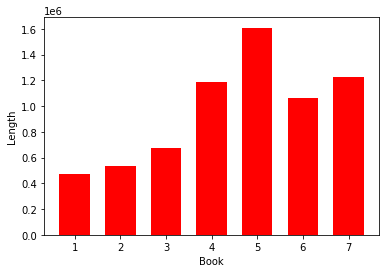

In [ ]:
y = lens
N = len(y)
x = [i+1 for i in range(N)]
width = 1/1.5

pylab.xlabel("Book")
pylab.ylabel("Length")
plt.bar(x, y, width, color="red", align='center')

In [ ]:
# Split into sentences
sentences = nltk.tokenize.sent_tokenize(temp)
print ("Total Sentences are " + str(len(sentences)))

Total Sentences are 63914


In [ ]:
sentences[:2]

['/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, \nwere proud to say that they were perfectly normal, \nthank you very much.',
 'They were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense.']

In [ ]:
with open("/content/drive/MyDrive/harry save data/out.txt", "w") as text_file:
    print(sentences, file=text_file)

In [ ]:
# sentences to list of words
sent_words = []
total_tokens = 0
for raw_sent in sentences:
    clean = nltk.word_tokenize(raw_sent)
    tokens = [i for i in clean if len(i) > 1]
    total_tokens += len(tokens)
    sent_words.append(tokens)

print ("Total tokens are " + str(total_tokens))

Total tokens are 1114832


In [ ]:
with open("/content/drive/MyDrive/harry save data/words.txt", "w") as text_file:
    print(sent_words, file=text_file)

Pos Tagging

In [ ]:
# sentences to list of words
words_pos_all = []

for raw_sent in sent_words:
    pos_token=nltk.pos_tag(raw_sent)
    words_pos_all.append(pos_token)

In [ ]:
words_pos_all[:4]

[[('THE', 'DT'),
  ('BOY', 'NNP'),
  ('WHO', 'NNP'),
  ('LIVED', 'NNP'),
  ('Mr.', 'NNP'),
  ('and', 'CC'),
  ('Mrs.', 'NNP'),
  ('Dursley', 'NNP'),
  ('of', 'IN'),
  ('number', 'NN'),
  ('four', 'CD'),
  ('Privet', 'NNP'),
  ('Drive', 'NNP'),
  ('were', 'VBD'),
  ('proud', 'JJ'),
  ('to', 'TO'),
  ('say', 'VB'),
  ('that', 'IN'),
  ('they', 'PRP'),
  ('were', 'VBD'),
  ('perfectly', 'RB'),
  ('normal', 'JJ'),
  ('thank', 'NN'),
  ('you', 'PRP'),
  ('very', 'RB'),
  ('much', 'RB')],
 [('They', 'PRP'),
  ('were', 'VBD'),
  ('the', 'DT'),
  ('last', 'JJ'),
  ('people', 'NNS'),
  ('you', 'PRP'),
  ('expect', 'VBP'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('involved', 'VBN'),
  ('in', 'IN'),
  ('anything', 'NN'),
  ('strange', 'JJ'),
  ('or', 'CC'),
  ('mysterious', 'JJ'),
  ('because', 'IN'),
  ('they', 'PRP'),
  ('just', 'RB'),
  ('didn', 'VBP'),
  ('hold', 'JJ'),
  ('with', 'IN'),
  ('such', 'JJ'),
  ('nonsense', 'NN')],
 [('Mr.', 'NNP'),
  ('Dursley', 'NNP'),
  ('was', 'VBD'),
  ('the', 'DT

In [ ]:
# sentences to list of words
words_pos = []

for raw_sent in sent_words:
    pos_token=nltk.pos_tag(raw_sent)
    nn_tagged = [(word,tag) for word, tag in pos_token if tag.startswith('NNP')]
    words_pos.append(nn_tagged)




In [ ]:
words_pos[:200]

[[('BOY', 'NNP'),
  ('WHO', 'NNP'),
  ('LIVED', 'NNP'),
  ('Mr.', 'NNP'),
  ('Mrs.', 'NNP'),
  ('Dursley', 'NNP'),
  ('Privet', 'NNP'),
  ('Drive', 'NNP')],
 [],
 [('Mr.', 'NNP'), ('Dursley', 'NNP'), ('Grunnings', 'NNP')],
 [],
 [('Mrs.', 'NNP'), ('Dursley', 'NNP')],
 [('Dursley', 'NNP'), ('Dudley', 'NNP')],
 [('Dursleys', 'NNP')],
 [],
 [('Mrs.', 'NNP'),
  ('Potter', 'NNP'),
  ('Mrs.', 'NNP'),
  ('Dursley', 'NNP'),
  ('Page', 'NNP'),
  ('Harry', 'NNP'),
  ('Potter', 'NNP'),
  ('Philosophers', 'NNP'),
  ('Stone', 'NNP'),
  ('J.K.', 'NNP'),
  ('Rowling', 'NNP'),
  ('Mrs.', 'NNP'),
  ('Dursley', 'NNP')],
 [('Dursleys', 'NNP'), ('Potters', 'NNPS')],
 [('Dursleys', 'NNP'), ('Potters', 'NNPS')],
 [('Potters', 'NNPS'), ('Dudley', 'NNP')],
 [('Mr.', 'NNP'), ('Mrs.', 'NNP'), ('Dursley', 'NNP'), ('Tuesday', 'NNP')],
 [('Mr.', 'NNP'),
  ('Dursley', 'NNP'),
  ('Mrs.', 'NNP'),
  ('Dursley', 'NNP'),
  ('Dudley', 'NNP')],
 [],
 [('Mr.', 'NNP'),
  ('Dursley', 'NNP'),
  ('Mrs.', 'NNP'),
  ('Dursley', 

In [ ]:
with open("/content/drive/MyDrive/harry save data/word_pos.txt", "w") as text_file:
    print(words_pos, file=text_file)

Named entity recognition

It is the process of detecting the named entities such as the person name, the location name, the company name, the quantities and the monetary value.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk

# sentences to list of words
chunk = []

for raw_sent in sent_words:
    pos_token=nltk.pos_tag(raw_sent)
    nn_tagged = [(word,tag) for word, tag in pos_token if tag.startswith('NNP')]
    chunk_tag = ne_chunk(nn_tagged)
    chunk.append(chunk_tag)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
chunk[:60]

[Tree('S', [('BOY', 'NNP'), ('WHO', 'NNP'), ('LIVED', 'NNP'), Tree('PERSON', [('Mr.', 'NNP')]), ('Mrs.', 'NNP'), Tree('PERSON', [('Dursley', 'NNP'), ('Privet', 'NNP'), ('Drive', 'NNP')])]),
 Tree('S', []),
 Tree('S', [Tree('PERSON', [('Mr.', 'NNP')]), Tree('PERSON', [('Dursley', 'NNP'), ('Grunnings', 'NNP')])]),
 Tree('S', []),
 Tree('S', [('Mrs.', 'NNP'), ('Dursley', 'NNP')]),
 Tree('S', [Tree('PERSON', [('Dursley', 'NNP')]), Tree('PERSON', [('Dudley', 'NNP')])]),
 Tree('S', [Tree('GPE', [('Dursleys', 'NNP')])]),
 Tree('S', []),
 Tree('S', [('Mrs.', 'NNP'), ('Potter', 'NNP'), ('Mrs.', 'NNP'), Tree('PERSON', [('Dursley', 'NNP'), ('Page', 'NNP'), ('Harry', 'NNP'), ('Potter', 'NNP'), ('Philosophers', 'NNP'), ('Stone', 'NNP')]), ('J.K.', 'NNP'), ('Rowling', 'NNP'), ('Mrs.', 'NNP'), ('Dursley', 'NNP')]),
 Tree('S', [Tree('GPE', [('Dursleys', 'NNP')]), Tree('ORGANIZATION', [('Potters', 'NNPS')])]),
 Tree('S', [Tree('GPE', [('Dursleys', 'NNP')]), Tree('ORGANIZATION', [('Potters', 'NNPS')])])

Chunking
Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining, chunking means a grouping of words or tokens into chunks.



Bi-gramn

In [ ]:
# capture collocations
bigram = gensim.models.Phrases(sent_words)
final = []
for s in sent_words:
    processed_sent = bigram[s]
    final.append(processed_sent)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Sample first two sentences
final[:2]

[['THE',
  'BOY',
  'WHO',
  'LIVED',
  'Mr.',
  'and',
  'Mrs._Dursley',
  'of',
  'number_four',
  'Privet_Drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they_were',
  'perfectly',
  'normal',
  'thank_you',
  'very_much'],
 ['They_were',
  'the',
  'last',
  'people',
  'you',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  'because',
  'they',
  'just',
  'didn',
  'hold',
  'with',
  'such',
  'nonsense']]

Model Parameters

We are now ready to train our word embeddings over all Harry Potter books. One thing that we need to decide upon is the model parameters. We will be using gensim's word2vec model implementation for training our model.

Parameters
Window Size: 7
Min Count: 2
Dimension: 200
Workers: 3

theory=https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
num_features = 200
min_word_count = 2
num_workers = 3
context_size = 7
seed = 1

In [ ]:
model = gensim.models.Word2Vec(sent_words, window=context_size,min_count=min_word_count, workers=num_workers,seed=seed, size=num_features)

In [ ]:
model.epochs=5

In [ ]:
model.train(sent_words,epochs=model.epochs,total_examples=model.corpus_total_words)

(4288226, 5574160)

In [ ]:
print ('Vocabulary ' + str(len(model.wv.vocab)))

Vocabulary 18471


In [ ]:
model.save("/content/drive/MyDrive/harry save data/harry2vec.w2v")

In [ ]:
print ('Similar kind of words for AZKABAN: ')
aa = model.most_similar('Azkaban')[0:10]
for word, score in aa:
    print('{} {}'.format(word.encode('utf-8'), score))

Similar kind of words for AZKABAN: 
b'Stone' 0.8337974548339844
b'Fire' 0.8324242830276489
b'Chamber' 0.8318600654602051
b'Secrets' 0.8101357221603394
b'Goblet' 0.8055983781814575
b'Philosophers' 0.7973560094833374
b'Blood' 0.7961214780807495
b'Hallows' 0.7925543785095215
b'Prince' 0.7879524230957031
b'Half' 0.7825939655303955


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print ('Similar kind of words for RON: ')
aa = model.most_similar('Ron')[0:10]
for word, score in aa:
    print('{} {}'.format(word.encode('utf-8'), score))

Similar kind of words for RON: 
b'Ginny' 0.6223344802856445
b'Neville' 0.5752665996551514
b'Griphook' 0.5443210601806641
b'Wood' 0.5053819417953491
b'Hagrid' 0.5041469931602478
b'Cho' 0.48746469616889954
b'Seamus' 0.48731333017349243
b'Cedric' 0.45676296949386597
b'Stan' 0.44232094287872314
b'Luna' 0.4390173554420471


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print ('Similar kind of words for SNAPE: ')
aa = model.most_similar('Snape')[0:10]
for word, score in aa:
    print('{} {}'.format(word.encode('utf-8'), score))

Similar kind of words for SNAPE: 
b'Dumbledore' 0.7455786466598511
b'Slughorn' 0.6917421817779541
b'Quirrell' 0.6577334403991699
b'Karkaroff' 0.6408932209014893
b'Lupin' 0.6261154413223267
b'Voldemort' 0.6040548086166382
b'Moody' 0.5895786881446838
b'Umbridge' 0.5575754642486572
b'headmaster' 0.5555095672607422
b'Fudge' 0.5445960760116577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print ('Similar kind of words for SNAPE: ')
aa = model.most_similar('Snape')[0:10]
for word, score in aa:
    print('{} {}'.format(word.encode('utf-8'), score))

Similar kind of words for SNAPE: 
b'Dumbledore' 0.7455786466598511
b'Slughorn' 0.6917421817779541
b'Quirrell' 0.6577334403991699
b'Karkaroff' 0.6408932209014893
b'Lupin' 0.6261154413223267
b'Voldemort' 0.6040548086166382
b'Moody' 0.5895786881446838
b'Umbridge' 0.5575754642486572
b'headmaster' 0.5555095672607422
b'Fudge' 0.5445960760116577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print ('Similar kind of words for Harry: ')
aa = model.most_similar('Harry')[0:5]
for word, score in aa:
    print('{} {}'.format(word.encode('utf-8'), score))

Similar kind of words for Harry: 
b'he' 0.5271121859550476
b'He' 0.4870307445526123
b'356' 0.41077226400375366
b'Levicorpus\\' 0.3962160050868988
b'again' 0.37650221586227417


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
start = time.time()
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
stop = time.time() - start
print ('Time taken is ' + str(stop))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Time taken is 395.8072597980499


In [ ]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
points.head(20)

,word,x,y
0,THE,-5.058432,-52.722904
1,BOY,-3.951128,-31.837894
2,WHO,-5.208688,-33.730732
3,Mr.,-11.684791,-40.370064
4,and,-52.585262,-16.491764
5,Mrs.,-11.691153,-40.421169
6,Dursley,-4.970640,-43.691059
7,of,-42.627941,-8.164887
8,number,-30.453415,-37.947083
9,four,-31.446100,-38.324490


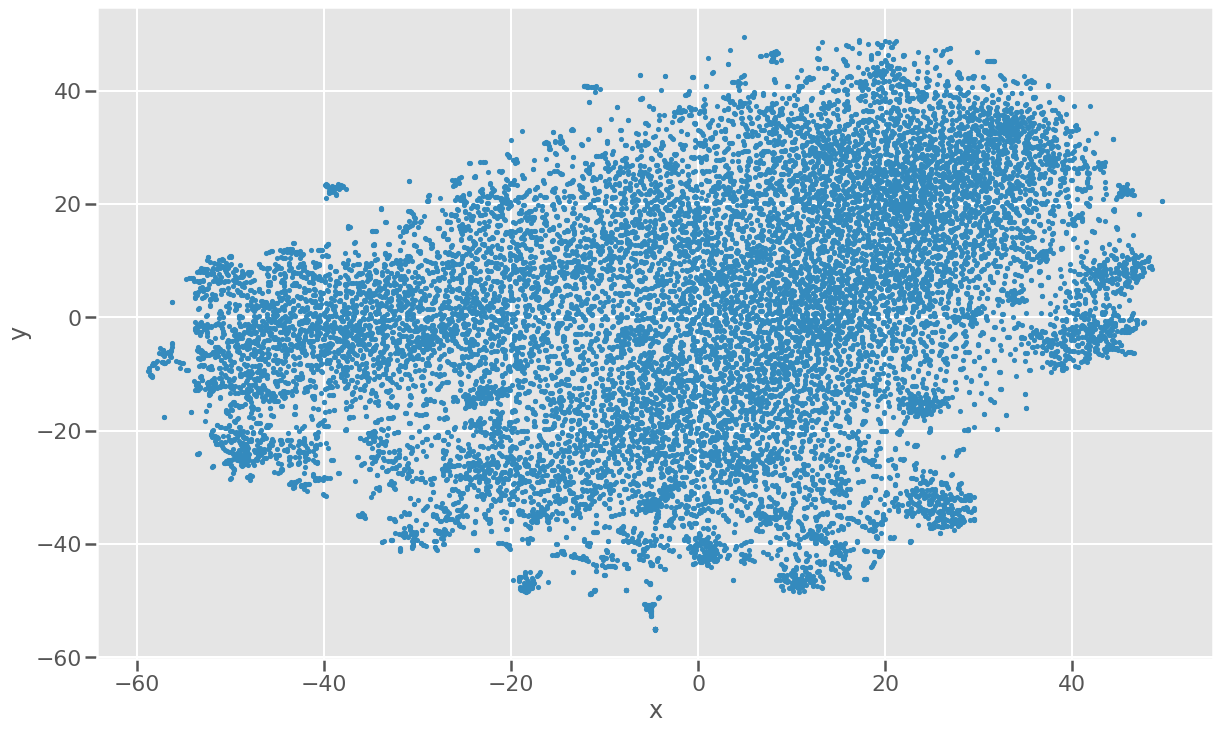

In [ ]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

# New Section

Harry Potter Book Sentiment Analysis


In [ ]:
import pandas as pd #Importing Pandas package

Bookfile=[] #Empty "Book" list - Prepare for loop

# Loops through importing 7 HP text files - Book 1 creates table, Books 2-7 append to Book 1 table
for i in range(1,8): 
    Bookfile.append('HPBook'+str(i)+'.txt')
    FileLoc = "/content/drive/MyDrive/HPBookdata/{}".format(Bookfile[i-1])
    if i == 1:
        df = pd.read_csv(FileLoc, sep="@")
    else:
        df2 = pd.read_csv(FileLoc, sep="@")
        df = pd.concat([df, df2])
        
import nltk #Import NLTK library
nltk.download('punkt') #installed punkt to fix error
from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# New Section

In [ ]:
# Creating a table breaking down the text by each sentence, rather than each chapter.
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Make smaller table - reset index to prepare for further work
dfsentiment = df[['Book','Chapter','Text']].reset_index() \
    .drop(["index"], axis=1)
dfsentiment = dfsentiment.join(dfsentiment.Text.apply(sent_tokenize).rename('Sentences')) # Breaking apart text into sentences

#Put every tokenized sentence into its own row
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["Text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values
dfsentiment2

,Book,Chapter,Sentence
0,1,1,the boy who lived mr and mrs dursley of numbe...
1,1,1,they were the last people youd expect to be in...
2,1,1,mr dursley was the director of a firm called g...
3,1,1,he was a big beefy man with hardly any neck al...
4,1,1,mrs dursley was thin and blonde and had nearly...
...,...,...,...
71011,7,37,the train began to more and harry walked along...
71012,7,37,harry kept smiling and waving even though it w...
71013,7,37,the train rounded a corner
71014,7,37,harrys hand was still raised in farewellhell b...


In [ ]:
# 71,016 rows in sentiment2 according to the table created
# Check that there are 71,016 sentences before stacking rows

dfsentiment.Sentences.apply(lambda x: len(x)).sum() # Count total sentences

71016

In [ ]:
# Bring in VADER library and Sentiment Intensity Analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Get intensity scores of each sentence
dfsentiment2['Score']=dfsentiment2.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment2['CompScore']=dfsentiment2.Score.apply(lambda x: x.get("compound"))
dfsentiment2['PosScore']=dfsentiment2.Score.apply(lambda x: x.get("pos"))
dfsentiment2['NegScore']=dfsentiment2.Score.apply(lambda x: x.get("neg"))
dfsentiment2['NeuScore']=dfsentiment2.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment2 = dfsentiment2.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment2['PosFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment2['NegFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment2['NeuFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Confirm scores are present and flag is functional
dfsentiment2.head(20)

dfsentiment2.iloc[66771].Sentence

dfsentiment2.groupby('Book').mean()['CompScore']

Book
1    0.019839
2    0.002158
3    0.005637
4    0.012198
5    0.007214
6    0.024079
7   -0.031754
Name: CompScore, dtype: float64

In [ ]:
dfsentiment2[:5]

,Book,Chapter,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,1,1,the boy who lived mr and mrs dursley of numbe...,0.8779,0.335,0.000,0.665,1,0,0
1,1,1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,1,1,mr dursley was the director of a firm called g...,0.0000,0.000,0.000,1.000,0,0,1
3,1,1,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,1,1,mrs dursley was thin and blonde and had nearly...,0.4927,0.084,0.000,0.916,1,0,0


In [ ]:
print('There are', dfsentiment2['PosFlag'].sum(), "positive sentences,", \
      dfsentiment2['NegFlag'].sum(), "negative sentences, and", \
      dfsentiment2['NeuFlag'].sum(), "neutral sentences")
print('This is a total of', \
      dfsentiment2['PosFlag'].sum()+dfsentiment2['NegFlag'].sum()+dfsentiment2['NeuFlag'].sum(), "sentences")

There are 19058 positive sentences, 18384 negative sentences, and 33574 neutral sentences
This is a total of 71016 sentences


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


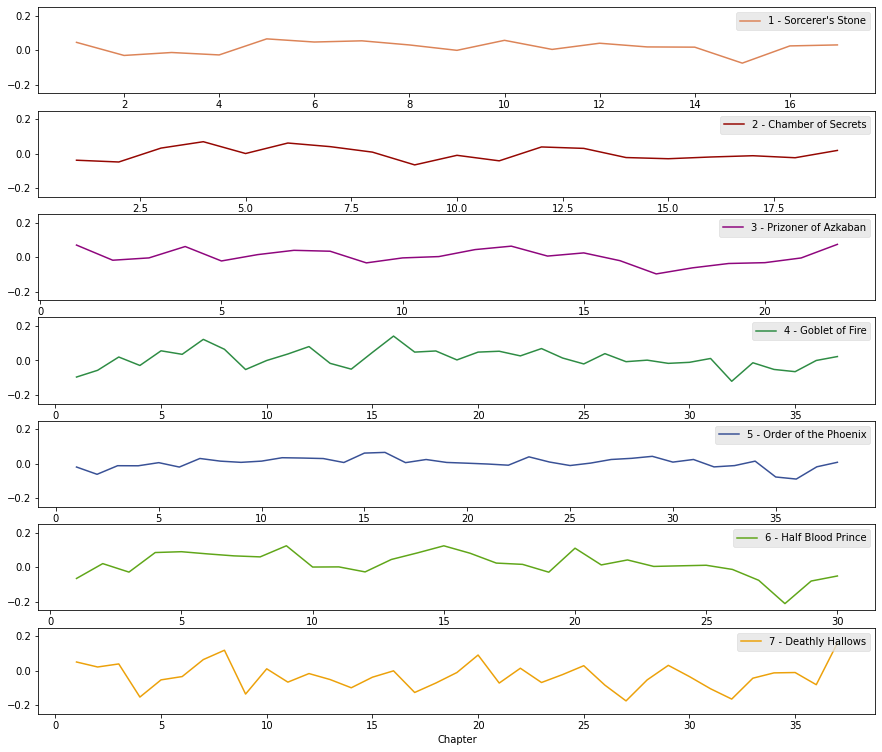

In [ ]:
# How does the sentiment change during each chapter of each book over time?

def Titles(x):
    if x == 1:
        return "1 - Sorcerer's Stone"
    if x == 2:
        return "2 - Chamber of Secrets"
    if x == 3:
        return "3 - Prizoner of Azkaban"
    if x == 4:
        return "4 - Goblet of Fire"
    if x == 5:
        return "5 - Order of the Phoenix"
    if x == 6:
        return "6 - Half Blood Prince"
    if x == 7:
        return "7 - Deathly Hallows"

dfsentiment2['BookTitle']=dfsentiment2.Book.apply(lambda x: Titles(x))

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

colorsList = ['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# plot data
fig, ax = plt.subplots(figsize=(15,13))
# use unstack()
dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subplots=True, ylim=(-0.25, 0.25), colormap=ColorMap)
plt.style.use('ggplot')
ax.set_ylabel('Compound Sentiment Score')

[ax.legend(loc=1) for ax in plt.gcf().axes]

plt.savefig('/content/drive/MyDrive/harry save data/HPTimeplot.png')

In [ ]:
# Preparing the bag of words

SentList = []

# Loop to tokenize words into one huge list
for x in dfsentiment2.Sentence:
    SentList.extend(word_tokenize(x))    

# Remove stopwords from this list
SentList = [''.join(item for item in x if item not in string.punctuation) for x in SentList]
    
#Create dictionary function - exclude stopwords
def BagOfWords(words):
    return {
        word:1 for word in words 
        if not word in stopwords}

In [ ]:
# Creating tables of positive and negative sentences

# Pull out rows with positive flag only
 PosTable = dfsentiment2.loc[dfsentiment2['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

 #Pull out rows with negative flag only
NegTable = dfsentiment2.loc[dfsentiment2['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [ ]:
# Creating lists of positive/negative words
PosList=[]
NegList=[]

# Loop to tokenize words into one huge list
for x in PosTable.Sentence:
    PosList.extend(sent_tokenize(x))    

for x in NegTable.Sentence:
    NegList.extend(sent_tokenize(x))

In [ ]:
# Creating dictionary of positive/negative words (using previous function)

PosDict=BagOfWords(PosList)
NegDict=BagOfWords(NegList)

# Creating Lists from dictionary entries

PosListClass=[(PosDict, 'pos')]
NegListClass=[(NegDict, 'neg')]

In [ ]:
# Creating positive and negative Bags of Words

def word_bayes(words):
    return dict([(word, True) for word in words.split() if word not in stopwords])

PosBayes = [(word_bayes(words), 'positive') for sentence in PosList]
NegBayes = [(word_bayes(words), 'negative') for sentence in NegList]

In [ ]:
# Open Naive Bayes Classifier Package
from nltk.classify import NaiveBayesClassifier

# Set Splits
PosSplit=int(PosTable.PosFlag.sum()/2)
NegSplit=int(NegTable.NegFlag.sum()/2)


  

#Train Model
sentiment_classifier = NaiveBayesClassifier.train(PosBayes[:PosSplit]+NegBayes[:NegSplit])

Training  Data Accuracy

In [ ]:
nltk.classify.util.accuracy(sentiment_classifier, PosBayes[:PosSplit]+NegBayes[:NegSplit])*100

90.90860530954544

Testing Data Accuracy

In [ ]:
nltk.classify.util.accuracy(sentiment_classifier, PosBayes[PosSplit:]+NegBayes[NegSplit:])*100

80.20939052401047

In [ ]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
               excellent = True           positi : negati =     38.3 : 1.0
                   anger = True           negati : positi =     28.7 : 1.0
               perfectly = True           positi : negati =     26.7 : 1.0
               brilliant = True           positi : negati =     24.1 : 1.0
                    fury = True           negati : positi =     21.1 : 1.0
               excitedly = True           positi : negati =     21.0 : 1.0
                    best = True           positi : negati =     20.7 : 1.0
                    glad = True           positi : negati =     17.9 : 1.0
                 sobbing = True           negati : positi =     16.2 : 1.0
                ignoring = True           negati : positi =     16.2 : 1.0


In [ ]:
sentiment_classifier.most_informative_features()

[('excellent', True),
 ('anger', True),
 ('perfectly', True),
 ('brilliant', True),
 ('fury', True),
 ('excitedly', True),
 ('best', True),
 ('glad', True),
 ('sobbing', True),
 ('ignoring', True),
 ('rage', True),
 ('furious', True),
 ('wonderful', True),
 ('pain', True),
 ('eaters', True),
 ('painful', True),
 ('nasty', True),
 ('excitement', True),
 ('bloody', True),
 ('murdered', True),
 ('perfect', True),
 ('suspicious', True),
 ('terrified', True),
 ('desperately', True),
 ('horror', True),
 ('magnificent', True),
 ('imperius', True),
 ('murder', True),
 ('great', True),
 ('amazement', True),
 ('pleasure', True),
 ('threatening', True),
 ('dirty', True),
 ('sick', True),
 ('frightened', True),
 ('cool', True),
 ('champions', True),
 ('strength', True),
 ('chuckled', True),
 ('mad', True),
 ('terrible', True),
 ('interest', True),
 ('dead', True),
 ('attacking', True),
 ('uncertainly', True),
 ('amazing', True),
 ('upset', True),
 ('smiling', True),
 ('delighted', True),
 ('disgus

In [ ]:
sentiment_classifier.labels()

['positive', 'negative']